##### Collect the Stock Data-- AAPL
##### Preprocessing the Data- Train and Test
##### Create an Stacked LSTM model
##### Predict the Test Data and plot the output
##### Predict the future 30 days and plot the output

In [73]:
## Data Collection

import pandas_datareader as pdr

In [74]:
key="99a8b86dd3f80fddf57fae44a5f58dd6fea7a943"

In [75]:
df= pdr.get_data_tiingo('AAPL',api_key=key)

In [76]:
df.to_csv('AAPL.csv')

In [77]:
import pandas as pd

In [78]:
df= pd.read_csv('AAPL.csv')

In [79]:
df.head()

,symbol,date,adjClose,adjHigh,adjLow,adjOpen,adjVolume,close,divCash,high,low,open,splitFactor,volume
0,AAPL,2015-07-15 00:00:00+00:00,116.867598,117.171700,115.724909,115.853922,33649200,126.82,0.0,127.15,125.58,125.72,1.0,33649200
1,AAPL,2015-07-16 00:00:00+00:00,118.424972,118.480264,117.356005,117.715399,36222447,128.51,0.0,128.57,127.35,127.74,1.0,36222447
2,AAPL,2015-07-17 00:00:00+00:00,119.447863,119.447863,118.240668,118.950241,46164710,129.62,0.0,129.62,128.31,129.08,1.0,46164710
3,AAPL,2015-07-20 00:00:00+00:00,121.705596,122.534967,120.443109,120.691920,58900203,132.07,0.0,132.97,130.70,130.97,1.0,58900203
4,AAPL,2015-07-21 00:00:00+00:00,120.489185,122.488891,120.092930,122.424384,76756427,130.75,0.0,132.92,130.32,132.85,1.0,76756427


In [81]:
df.tail()

,symbol,date,adjClose,adjHigh,adjLow,adjOpen,adjVolume,close,divCash,high,low,open,splitFactor,volume
1252,AAPL,2020-07-06 00:00:00+00:00,373.85,375.78,369.87,370.00,29745900,373.85,0.0,375.78,369.87,370.00,1.0,29745900
1253,AAPL,2020-07-07 00:00:00+00:00,372.69,378.62,372.23,375.41,28207000,372.69,0.0,378.62,372.23,375.41,1.0,28207000
1254,AAPL,2020-07-08 00:00:00+00:00,381.37,381.50,376.36,376.72,29274500,381.37,0.0,381.50,376.36,376.72,1.0,29274500
1255,AAPL,2020-07-09 00:00:00+00:00,383.01,385.27,378.69,385.05,31420400,383.01,0.0,385.27,378.69,385.05,1.0,31420400
1256,AAPL,2020-07-10 00:00:00+00:00,383.68,383.92,378.82,381.34,22564300,383.68,0.0,383.92,378.82,381.34,1.0,22564300


In [82]:
df1.shape

(1257, 1)

In [83]:
df1= df.reset_index()['close']

In [84]:
df1.shape

(1257,)

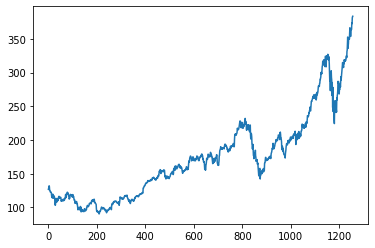

In [85]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [86]:
## LSTM are sensitive to the scale of the data. So we apply MinMax scaler

In [87]:
import numpy as np

In [88]:
df1

0       126.82
1       128.51
2       129.62
3       132.07
4       130.75
5       125.22
6       125.16
7       124.50
8       122.77
9       123.38
10      122.99
11      122.37
12      121.30
13      118.44
14      114.64
15      115.40
16      115.13
17      115.52
18      119.72
19      113.49
20      115.24
21      115.15
22      115.96
23      117.16
24      116.50
25      115.01
26      112.65
27      105.76
28      103.12
29      103.74
         ...  
1227    317.94
1228    321.85
1229    323.34
1230    325.12
1231    322.32
1232    331.50
1233    333.46
1234    343.99
1235    352.84
1236    335.90
1237    338.80
1238    342.99
1239    352.08
1240    351.59
1241    351.73
1242    349.72
1243    358.87
1244    366.53
1245    360.06
1246    364.84
1247    353.63
1248    361.78
1249    364.80
1250    364.11
1251    364.11
1252    373.85
1253    372.69
1254    381.37
1255    383.01
1256    383.68
Name: close, Length: 1257, dtype: float64

In [89]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range=(0,1))
df1= scaler.fit_transform(np.array(df1).reshape(-1,1))

In [90]:
df1.shape

(1257, 1)

In [91]:
df1

array([[0.12436081],
       [0.13012204],
       [0.13390605],
       ...,
       [0.99212518],
       [0.99771596],
       [1.        ]])

In [92]:
## Splitting dataset into train and test split
training_size= int(len(df1)*0.65)
test_size= len(df1)-training_size
train_data,test_data= df1[0:training_size,:],df1[training_size:len(df1),:1]

In [93]:
training_size, test_size

(817, 440)

In [94]:
len(train_data),len(test_data)

(817, 440)

In [95]:
train_data

array([[0.12436081],
       [0.13012204],
       [0.13390605],
       [0.14225813],
       [0.13775823],
       [0.11890639],
       [0.11870185],
       [0.1164519 ],
       [0.11055431],
       [0.1126338 ],
       [0.11130429],
       [0.1091907 ],
       [0.10554306],
       [0.09579328],
       [0.08283903],
       [0.08542988],
       [0.08450944],
       [0.08583896],
       [0.10015681],
       [0.07891866],
       [0.08488443],
       [0.08457762],
       [0.08733892],
       [0.09142974],
       [0.08917979],
       [0.08410036],
       [0.07605509],
       [0.05256699],
       [0.04356719],
       [0.04568078],
       [0.06596441],
       [0.07697552],
       [0.07823686],
       [0.07643008],
       [0.05924865],
       [0.0749983 ],
       [0.06828254],
       [0.06453262],
       [0.07489603],
       [0.06753256],
       [0.07578237],
       [0.08137315],
       [0.08512307],
       [0.08842981],
       [0.08887298],
       [0.08038454],
       [0.0787823 ],
       [0.084

In [96]:
test_data

array([[0.42960387],
       [0.42309266],
       [0.4492057 ],
       [0.43301289],
       [0.44934206],
       [0.44606941],
       [0.42844481],
       [0.43966046],
       [0.44422854],
       [0.45131929],
       [0.42527443],
       [0.44133088],
       [0.42939933],
       [0.41555874],
       [0.41917229],
       [0.43812641],
       [0.44958069],
       [0.39933183],
       [0.37925274],
       [0.38668439],
       [0.4077521 ],
       [0.40277494],
       [0.3890707 ],
       [0.35395786],
       [0.34734438],
       [0.32883344],
       [0.34454899],
       [0.3517761 ],
       [0.32562896],
       [0.29535692],
       [0.29467512],
       [0.27936865],
       [0.28731165],
       [0.28601623],
       [0.30885662],
       [0.30411809],
       [0.30081135],
       [0.32208359],
       [0.29436831],
       [0.28765255],
       [0.2664144 ],
       [0.2701984 ],
       [0.26689166],
       [0.2684939 ],
       [0.27480057],
       [0.25615327],
       [0.25090339],
       [0.258

In [97]:
import numpy

# convert a array of matrix into dataset matrix
def create_dataset(dataset,time_step=1):
    dataX,dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        a= dataset[i:(i+time_step),0]    #### i= 0,1,2,3.........99
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return numpy.array(dataX),numpy.array(dataY)

In [98]:
## reshape into X=t, t+1, t+2 , t+3 and Y=t+4

time_step=100
X_train,y_train= create_dataset(train_data,time_step)
X_test,y_test= create_dataset(test_data,time_step)

In [99]:
print(X_train.shape),print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [100]:
print(X_test.shape),print(y_test.shape)

(339, 100)
(339,)


(None, None)

In [101]:
## reshape input to be[Sample, time steps, features] which is required for LSTM
## converting 2D data like(33,100) into 3D data(339,100,1)

X_train= X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test= X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [102]:
## Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [103]:
## Here input_shape=(100,1) is (X_train.shape[1],1) or (X_test.shape[1],1)

model= Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam') 

In [104]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [105]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Train on 716 samples, validate on 339 samples
Epoch 1/100
716/716 [==============================] - 13s 18ms/sample - loss: 0.0164 - val_loss: 0.0362
Epoch 2/100
716/716 [==============================] - 6s 9ms/sample - loss: 0.0034 - val_loss: 0.0035
Epoch 3/100
716/716 [==============================] - 7s 9ms/sample - loss: 8.5618e-04 - val_loss: 0.0122
Epoch 4/100
716/716 [==============================] - 7s 10ms/sample - loss: 5.3994e-04 - val_loss: 0.0030
Epoch 5/100
716/716 [==============================] - 6s 9ms/sample - loss: 4.8602e-04 - val_loss: 0.0032
Epoch 6/100
716/716 [==============================] - 7s 9ms/sample - loss: 4.2204e-04 - val_loss: 0.0033
Epoch 7/100
716/716 [==============================] - 10s 14ms/sample - loss: 4.0187e-04 - val_loss: 0.0027
Epoch 8/100
716/716 [==============================] - 10s 14ms/sample - loss: 4.1327e-04 - val_loss: 0.0026
Epoch 9/100
716/716 [==============================] - 10s 15ms/sample - loss: 3.8354e-04 - val_los

716/716 [==============================] - 7s 10ms/sample - loss: 1.5413e-04 - val_loss: 8.5203e-04
Epoch 76/100
716/716 [==============================] - 7s 10ms/sample - loss: 1.5506e-04 - val_loss: 8.5106e-04
Epoch 77/100
716/716 [==============================] - 7s 10ms/sample - loss: 1.7137e-04 - val_loss: 0.0015
Epoch 78/100
716/716 [==============================] - 7s 9ms/sample - loss: 1.6674e-04 - val_loss: 8.9783e-04
Epoch 79/100
716/716 [==============================] - 7s 9ms/sample - loss: 1.4882e-04 - val_loss: 0.0014
Epoch 80/100
716/716 [==============================] - 7s 9ms/sample - loss: 1.6265e-04 - val_loss: 8.2759e-04
Epoch 81/100
716/716 [==============================] - 7s 9ms/sample - loss: 1.5579e-04 - val_loss: 8.7795e-04
Epoch 82/100
716/716 [==============================] - 7s 10ms/sample - loss: 1.6245e-04 - val_loss: 0.0011
Epoch 83/100
716/716 [==============================] - 7s 10ms/sample - loss: 1.7019e-04 - val_loss: 9.8646e-04
Epoch 84/100

In [106]:
## Lets do the prediction and check perforance metrics
train_predict=model.predict(X_train)
test_predict= model.predict(X_test)

In [107]:
## Transformback to original form (reverse scale the data while we have already scaled this data
## for RMSE performance metrics)
train_predict= scaler.inverse_transform(train_predict)
test_predict= scaler.inverse_transform(test_predict)

In [108]:
## Calculate RMSE performance metrics

import math
from sklearn.metrics import mean_squared_error

#for train_data

math.sqrt(mean_squared_error(y_train,train_predict))

149.3375969613532

In [109]:
# for test_data
math.sqrt(mean_squared_error(y_test,test_predict))

256.6169740620592

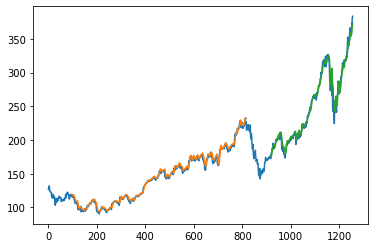

In [110]:
# Shift train predictions for plotting
look_back=100
trainPredictPlot= numpy.empty_like(df1)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:]=train_predict

# Shift train predictions for plotting
testPredictPlot= numpy.empty_like(df1)
testPredictPlot[:,:]=numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1,:]=test_predict

#Plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

#### Predict the future 30 days and plot the output

In [111]:
len(test_data)

440

In [112]:
x_input= test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [113]:
temp_input= list(x_input)
temp_input= temp_input[0].tolist()

In [114]:
temp_input

[0.7952546533033339,
 0.783936728710711,
 0.7592213813322425,
 0.7085293516056453,
 0.6740983159473647,
 0.6896775073293787,
 0.6244630803845366,
 0.6239176382354946,
 0.7106770300674984,
 0.6783254926024408,
 0.7240744528533442,
 0.6905979409558873,
 0.677336878707302,
 0.5994068316629168,
 0.6647576191450193,
 0.6309742960387263,
 0.5382491307015749,
 0.6396331901547693,
 0.5177268698438672,
 0.5540328628894797,
 0.5329310697484146,
 0.5264880343628553,
 0.4735119656371446,
 0.45691007022567665,
 0.5336469625690324,
 0.5290107043021749,
 0.5730551578373217,
 0.5365787141201336,
 0.5606804390809299,
 0.5589077520965432,
 0.5132951523829004,
 0.5269993863775823,
 0.5149996590986567,
 0.586793481966319,
 0.5764300811345197,
 0.5990659303197654,
 0.6056112361082702,
 0.6235426467580282,
 0.6705870321129065,
 0.6616554169223426,
 0.6693597872775617,
 0.6560987250289766,
 0.6360878161859957,
 0.6069066612122451,
 0.63325833503784,
 0.6296106906661211,
 0.6566782573123339,
 0.65736005999863

In [116]:
## demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if (len(temp_input)>100):
        #print(temp_input)
        x_input= np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input= x_input.reshape(1,-1)
        x_input= x_input.reshape(1,n_steps,1)
        #print(x_input)
        yhat= model.predict(x_input,verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input=x_input.reshape((1,n_steps,1))
        yhat= model.predict(x_input,verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
        
print(lst_output)
        

0 day input [0.78393673 0.75922138 0.70852935 0.67409832 0.68967751 0.62446308
 0.62391764 0.71067703 0.67832549 0.72407445 0.69059794 0.67733688
 0.59940683 0.66475762 0.6309743  0.53824913 0.63963319 0.51772687
 0.55403286 0.53293107 0.52648803 0.47351197 0.45691007 0.53364696
 0.5290107  0.57305516 0.53657871 0.56068044 0.55890775 0.51329515
 0.52699939 0.51499966 0.58679348 0.57643008 0.59906593 0.60561124
 0.62354265 0.67058703 0.66165542 0.66935979 0.65609873 0.63608782
 0.60690666 0.63325834 0.62961069 0.65667826 0.65736006 0.64171269
 0.67290516 0.69359787 0.67747324 0.6914161  0.70641576 0.71688143
 0.72748347 0.74926706 0.76590305 0.7536306  0.74081271 0.74725574
 0.74101725 0.7657326  0.75952819 0.78028908 0.77217563 0.77913002
 0.77176655 0.77647099 0.77694825 0.77589146 0.7892207  0.79430013
 0.80036817 0.79082294 0.82211768 0.82879935 0.86469626 0.89486603
 0.83711734 0.84700348 0.86128724 0.89227518 0.89060476 0.89108202
 0.8842299  0.91542238 0.94153542 0.9194791  0.935

8 day output [[0.9060899]]
9 day input [0.72407445 0.69059794 0.67733688 0.59940683 0.66475762 0.6309743
 0.53824913 0.63963319 0.51772687 0.55403286 0.53293107 0.52648803
 0.47351197 0.45691007 0.53364696 0.5290107  0.57305516 0.53657871
 0.56068044 0.55890775 0.51329515 0.52699939 0.51499966 0.58679348
 0.57643008 0.59906593 0.60561124 0.62354265 0.67058703 0.66165542
 0.66935979 0.65609873 0.63608782 0.60690666 0.63325834 0.62961069
 0.65667826 0.65736006 0.64171269 0.67290516 0.69359787 0.67747324
 0.6914161  0.70641576 0.71688143 0.72748347 0.74926706 0.76590305
 0.7536306  0.74081271 0.74725574 0.74101725 0.7657326  0.75952819
 0.78028908 0.77217563 0.77913002 0.77176655 0.77647099 0.77694825
 0.77589146 0.7892207  0.79430013 0.80036817 0.79082294 0.82211768
 0.82879935 0.86469626 0.89486603 0.83711734 0.84700348 0.86128724
 0.89227518 0.89060476 0.89108202 0.8842299  0.91542238 0.94153542
 0.9194791  0.93577419 0.89755915 0.92534261 0.93563783 0.93328561
 0.93328561 0.9664894  0

17 day output [[0.9331085]]
18 day input [0.55403286 0.53293107 0.52648803 0.47351197 0.45691007 0.53364696
 0.5290107  0.57305516 0.53657871 0.56068044 0.55890775 0.51329515
 0.52699939 0.51499966 0.58679348 0.57643008 0.59906593 0.60561124
 0.62354265 0.67058703 0.66165542 0.66935979 0.65609873 0.63608782
 0.60690666 0.63325834 0.62961069 0.65667826 0.65736006 0.64171269
 0.67290516 0.69359787 0.67747324 0.6914161  0.70641576 0.71688143
 0.72748347 0.74926706 0.76590305 0.7536306  0.74081271 0.74725574
 0.74101725 0.7657326  0.75952819 0.78028908 0.77217563 0.77913002
 0.77176655 0.77647099 0.77694825 0.77589146 0.7892207  0.79430013
 0.80036817 0.79082294 0.82211768 0.82879935 0.86469626 0.89486603
 0.83711734 0.84700348 0.86128724 0.89227518 0.89060476 0.89108202
 0.8842299  0.91542238 0.94153542 0.9194791  0.93577419 0.89755915
 0.92534261 0.93563783 0.93328561 0.93328561 0.9664894  0.96253494
 0.99212518 0.99771596 1.         0.98187512 0.97846258 0.96843028
 0.95582551 0.9428741

26 day output [[0.90634406]]
27 day input [0.56068044 0.55890775 0.51329515 0.52699939 0.51499966 0.58679348
 0.57643008 0.59906593 0.60561124 0.62354265 0.67058703 0.66165542
 0.66935979 0.65609873 0.63608782 0.60690666 0.63325834 0.62961069
 0.65667826 0.65736006 0.64171269 0.67290516 0.69359787 0.67747324
 0.6914161  0.70641576 0.71688143 0.72748347 0.74926706 0.76590305
 0.7536306  0.74081271 0.74725574 0.74101725 0.7657326  0.75952819
 0.78028908 0.77217563 0.77913002 0.77176655 0.77647099 0.77694825
 0.77589146 0.7892207  0.79430013 0.80036817 0.79082294 0.82211768
 0.82879935 0.86469626 0.89486603 0.83711734 0.84700348 0.86128724
 0.89227518 0.89060476 0.89108202 0.8842299  0.91542238 0.94153542
 0.9194791  0.93577419 0.89755915 0.92534261 0.93563783 0.93328561
 0.93328561 0.9664894  0.96253494 0.99212518 0.99771596 1.
 0.98187512 0.97846258 0.96843028 0.95582551 0.94287413 0.93089616
 0.92078286 0.91312557 0.90822333 0.9060899  0.90647876 0.90893638
 0.91286474 0.91759485 0.922

In [118]:
day_new= np.arange(1,101)
day_pred= np.arange(101,131)

In [119]:
import matplotlib.pyplot as plt

In [120]:
len(df1)

1257

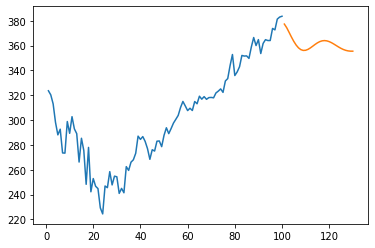

In [129]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

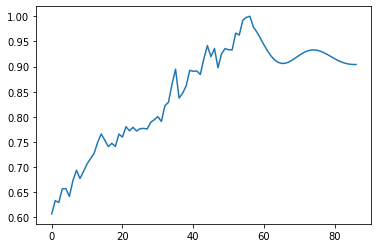

In [131]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])